Importing all the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import naive_bayes
from sklearn import ensemble
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing the dataset and converting below mentioned columns.

In [0]:
football = pd.read_csv("/content/FIFA 2018 Statistics.csv")
football['Man of the Match'] = football['Man of the Match'].map({'Yes': 1, 'No': 0})
football["PSO"] = football["PSO"].map({'Yes': 1, 'No': 0})

**Preprocessing 1**:
Calculate pearson correlation coefficient for all the numerical features against the 'Man of the Match' column.

Pearson correlation coefficient shows linear correlation between two variables.

                        Man of the Match
Goal Scored                     0.522193
Ball Possession %               0.110393
Attempts                        0.176425
On-Target                       0.291346
Off-Target                      0.152979
Blocked                        -0.019582
Corners                         0.173148
Offsides                        0.026288
Free Kicks                      0.119534
Saves                          -0.034443
Pass Accuracy %                 0.109709
Passes                          0.101421
Distance Covered (Kms)          0.015353
Fouls Committed                -0.129047
Yellow Card                    -0.147934
Yellow & Red                    0.000000
Red                            -0.125988
Man of the Match                1.000000
1st Goal                        0.009802
PSO                             0.000000
Goals in PSO                    0.038873
Own goals                            NaN
Own goal Time                  -0.186824


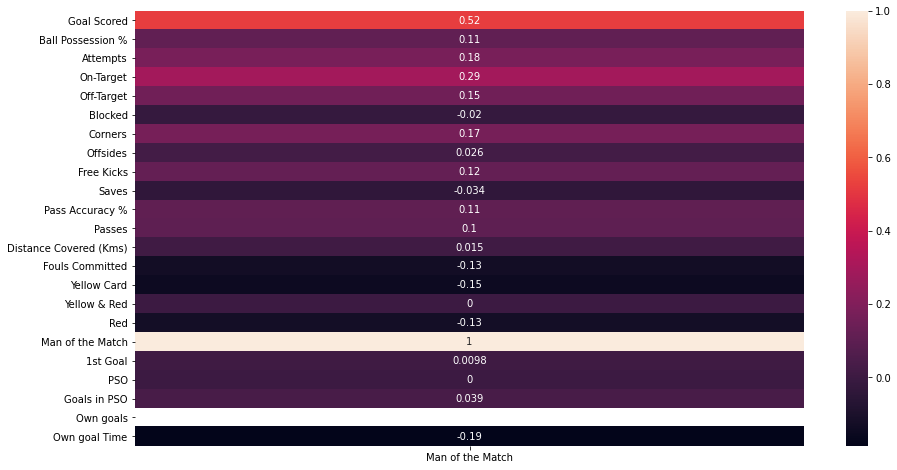

In [3]:
corr = football.corr()
corr = corr.filter(items = ['Man of the Match'])
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
print(corr)

**Preprocessing 2**:
Deleted all the features whose pearson correlation coefficient value was [0, 0.1) or (-0.1, 0]

In [4]:
for i in corr.index:
  if (((corr.loc[i].at["Man of the Match"] < 0.1) and (corr.loc[i].at["Man of the Match"] > 0)) or ((corr.loc[i].at["Man of the Match"] > -0.1) and (corr.loc[i].at["Man of the Match"] <= 0))):
    corr.drop(index = i, inplace = True)
corr.drop(index = ["Own goals", "Own goal Time"], inplace = True)
print(corr)

                   Man of the Match
Goal Scored                0.522193
Ball Possession %          0.110393
Attempts                   0.176425
On-Target                  0.291346
Off-Target                 0.152979
Corners                    0.173148
Free Kicks                 0.119534
Pass Accuracy %            0.109709
Passes                     0.101421
Fouls Committed           -0.129047
Yellow Card               -0.147934
Red                       -0.125988
Man of the Match           1.000000


**Preprocessing 3**:
One-hot-encoding of Team and Opposition features

In [5]:
football = football.drop(columns=["Date", "1st Goal", "Round", "Own goals", "Own goal Time"], axis=1)
football = pd.get_dummies(football)
print(football.head())

   Goal Scored  Ball Possession %  ...  Opponent_Tunisia  Opponent_Uruguay
0            5                 40  ...                 0                 0
1            0                 60  ...                 0                 0
2            0                 43  ...                 0                 1
3            1                 57  ...                 0                 0
4            0                 64  ...                 0                 0

[5 rows x 84 columns]


**Preprocessing 4**:
Feature vector X, Label vector Y and splitting into training and test set

In [6]:
Y = football.loc[:, ["Man of the Match"]]
X = football.drop(columns = "Man of the Match", axis = 1)
print(X.shape, Y.shape)

(128, 83) (128, 1)


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)
Y_train = Y_train.to_numpy().ravel()
print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(96, 83) (32, 83) (96,) (32, 1)


### **Following are the classification algorithms used with mentioned hyperparameters**:


*   Logistic Regression
*   Support Vector Classifier
*   Decision Tree Classifier
*   Random Forest Classifier





In [8]:
clf = LogisticRegression(random_state=0, max_iter = 10000).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
accuracy = (cm[0][0] + cm[1][1])/(cm[1][0] + cm[0][0] + cm[1][1] + cm[0][1])
print(accuracy)
print(cm)
#LogisticRegression

0.625
[[ 8  6]
 [ 6 12]]


In [10]:
clf = svm.SVC(random_state=0, kernel="linear").fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
accuracy = (cm[0][0] + cm[1][1])/(cm[1][0] + cm[0][0] + cm[1][1] + cm[0][1])
print(accuracy)
print(cm)

0.625
[[ 8  6]
 [ 6 12]]


In [11]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="gini", splitter="random", max_features=61, random_state=0).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
accuracy = (cm[0][0] + cm[1][1])/(cm[1][0] + cm[0][0] + cm[1][1] + cm[0][1])
print(accuracy)
print(cm)

0.84375
[[12  2]
 [ 3 15]]


In [12]:
clf = ensemble.RandomForestClassifier(n_estimators=500).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
accuracy = (cm[0][0] + cm[1][1])/(cm[1][0] + cm[0][0] + cm[1][1] + cm[0][1])
print(accuracy)
print(cm)

0.71875
[[12  2]
 [ 7 11]]


In [0]:
#for i in range(100, 10000, 100):
#  for j in range(1, 84):
#    clf = ensemble.RandomForestClassifier(n_estimators=i, criterion = "entropy", max_features = j, random_state = 0).fit(X_train, Y_train)
#    Y_pred = clf.predict(X_test)
#    cm = confusion_matrix(Y_test, Y_pred)
#    accuracy = (cm[0][0] + cm[1][1])/(cm[1][0] + cm[0][0] + cm[1][1] + cm[0][1])
#    if (accuracy >= 0.90625):
#      print(accuracy, i, j, "entropy")


    #clf = ensemble.RandomForestClassifier(n_estimators=i, criterion = "gini", max_features = j, random_state = 0).fit(X_train, Y_train)
    #Y_pred = clf.predict(X_test)
    #cm = confusion_matrix(Y_test, Y_pred)
    #accuracy = (cm[0][0] + cm[1][1])/(cm[1][0] + cm[0][0] + cm[1][1] + cm[0][1])
    #if (accuracy >= 0.90625):
    #  print(accuracy, i, j, "gini")     
#Random Forest Classifier 2
#best config: random forest - n_estimators=100, criterion = "gini", max_features = 57, random_state = 0

In [14]:
clf = ensemble.RandomForestClassifier(n_estimators=100, criterion = "gini", max_features = 57, random_state = 0).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
accuracy = (cm[0][0] + cm[1][1])/(cm[1][0] + cm[0][0] + cm[1][1] + cm[0][1])
print(accuracy)
print(cm)

0.90625
[[12  2]
 [ 1 17]]


## Random Forest Classifier with hyperparameters:
### n_estimators=100, criterion = "gini", max_features = 57, random_state = 0
### gives the best prediction